In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우즈의 '맑은 고딕'설정
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
data_df = pd.read_csv('./df_security_concat_9.csv', encoding='cp949')
data_df

,state,city,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,crime_rate,avg_pop_density,mean_hours,mean_days,new_state
0,강원도,정선군,8151609,515.0,4391.0,13.0,0.0271,90.36,427.8,1.62,강원도 정선군
1,강원도,평창군,13399820,190.0,6747.0,46.0,0.0271,90.36,395.8,1.62,강원도 평창군
2,강원도,홍천군,15125927,428.0,1191.0,37.0,0.0271,90.36,388.8,1.54,강원도 홍천군
3,강원도,양구군,1828609,296.0,190.0,22.0,0.0271,90.36,387.2,1.80,강원도 양구군
4,강원도,고성군,11612683,422.0,4391.0,94.0,0.0271,90.36,375.2,1.56,강원도 고성군
5,경기도,가평군,22165414,425.0,9119.0,206.0,0.2489,1303.40,316.6,1.36,경기도 가평군
6,경기도,연천군,5752900,530.0,4675.0,147.0,0.2489,1303.40,284.8,1.52,경기도 연천군
7,경기도,평택시,24993680,2321.0,10561.0,1740.0,0.2489,1303.40,283.4,1.88,경기도 평택시
8,경기도,포천시,21473221,1400.0,10000.0,34.0,0.2489,1303.40,263.4,1.58,경기도 포천시
9,경기도,화성시,52221879,11327.0,17499.0,46.0,0.2489,1303.40,232.6,1.84,경기도 화성시


In [14]:
df_for_heat = data_df.iloc[:,2:10]

In [3]:
a = {
    'visit_cnt' : 'sum',
    'cctv_cnt' : 'sum',
    'sclight_cnt' : 'sum',
    'smalight_cnt' : 'sum',
    'mean_hours' : 'mean',
    'mean_days' : 'mean',
    'crime_rate' : 'mean',
    'avg_pop_density' : 'mean',
    
}


state_groupby = data_df.groupby(['state'], as_index=False).agg(a)
state_groupby

,state,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,mean_hours,mean_days,crime_rate,avg_pop_density
0,강원도,50118648,1851.0,16910.0,212.0,394.96,1.628,0.0271,90.36
1,경기도,126607094,16003.0,51854.0,2173.0,276.16,1.636,0.2489,1303.40
2,경상남도,49487026,5101.0,33514.0,275.0,315.20,1.556,0.0722,316.54
3,경상북도,19024802,2523.0,30588.0,226.0,412.52,1.828,0.0451,139.72
4,광주광역시,99400593,1720.0,42196.0,255.0,208.20,1.840,0.0283,2964.74
5,대구광역시,132201023,9128.0,57018.0,237.0,205.28,1.840,0.0494,2744.80
6,대전광역시,101756434,3550.0,60008.0,306.5,203.24,1.788,0.0307,2781.58
7,부산광역시,99646860,2198.0,22283.0,191.0,198.00,1.880,0.0767,4378.44
8,서울특별시,106405870,9226.0,47125.0,3826.0,226.12,1.884,0.1929,15899.10
9,세종특별자치시,18211355,1218.0,8029.0,23.0,290.40,1.800,0.0041,708.64


### pairplot그리기

In [10]:
sns.pairplot?

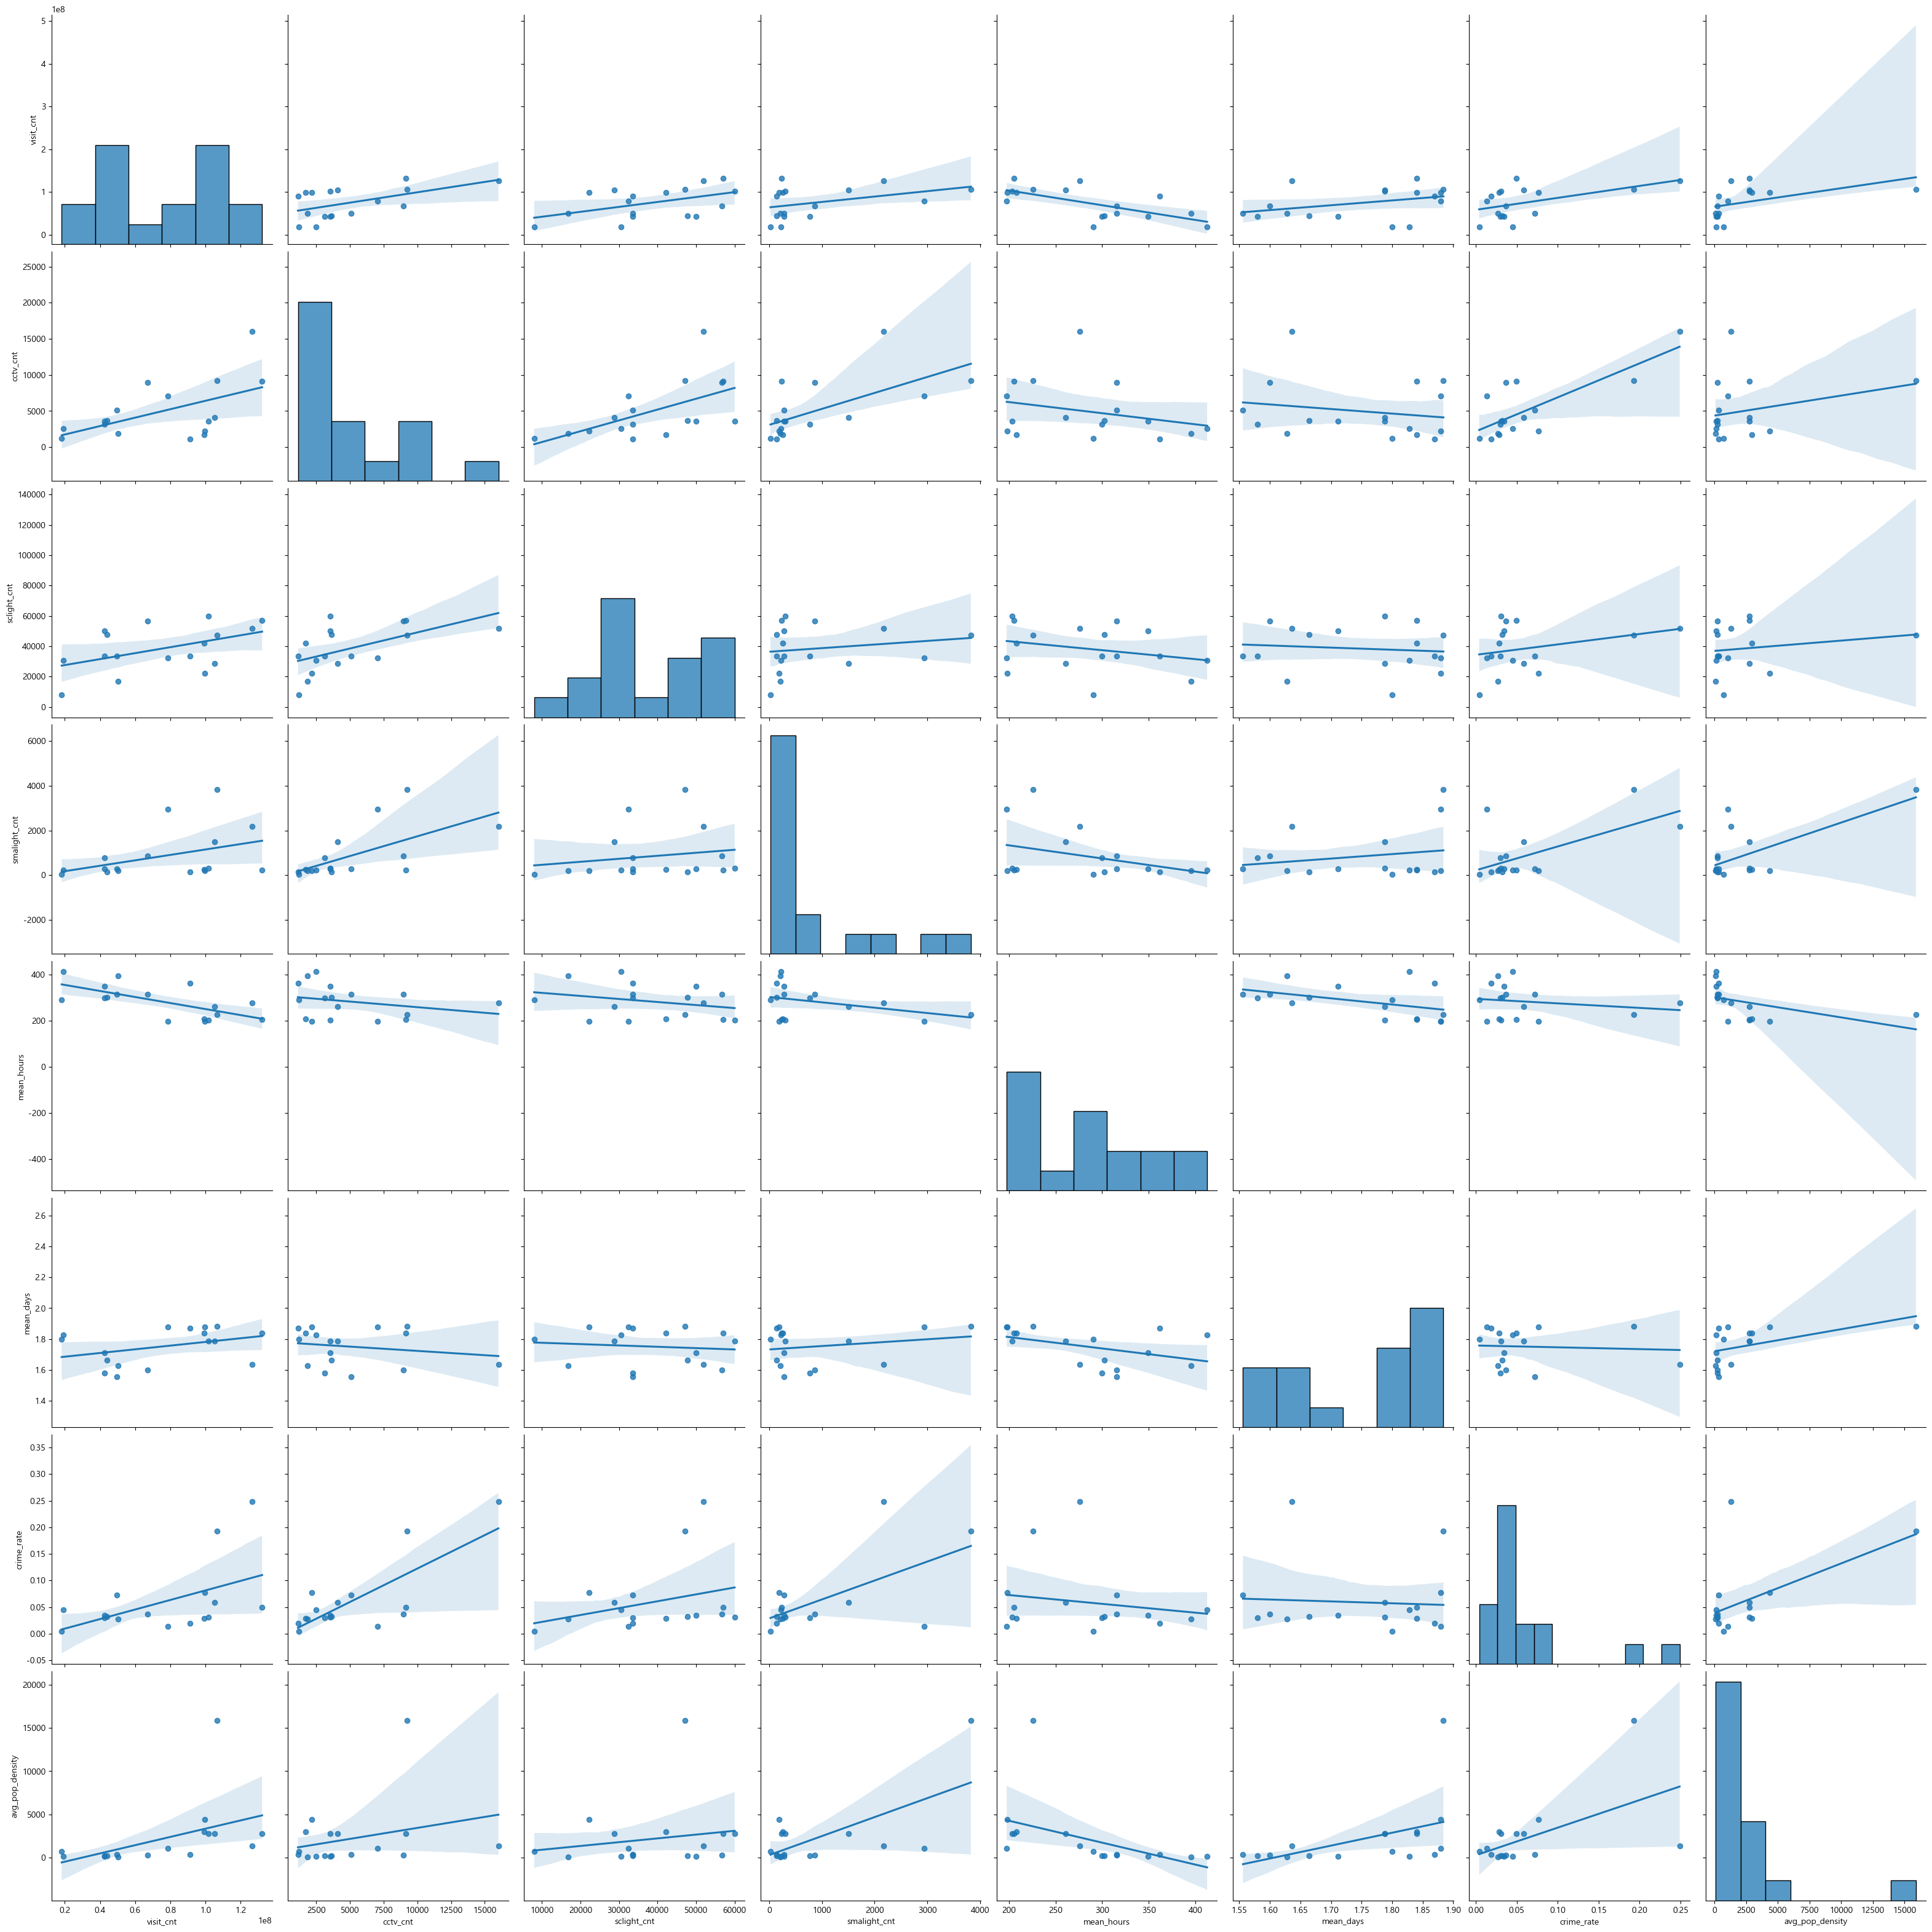

In [27]:
sns.pairplot(state_groupby, kind='reg', height=4)
plt.savefig('pairplot_GroupbyStates',dpi=300)

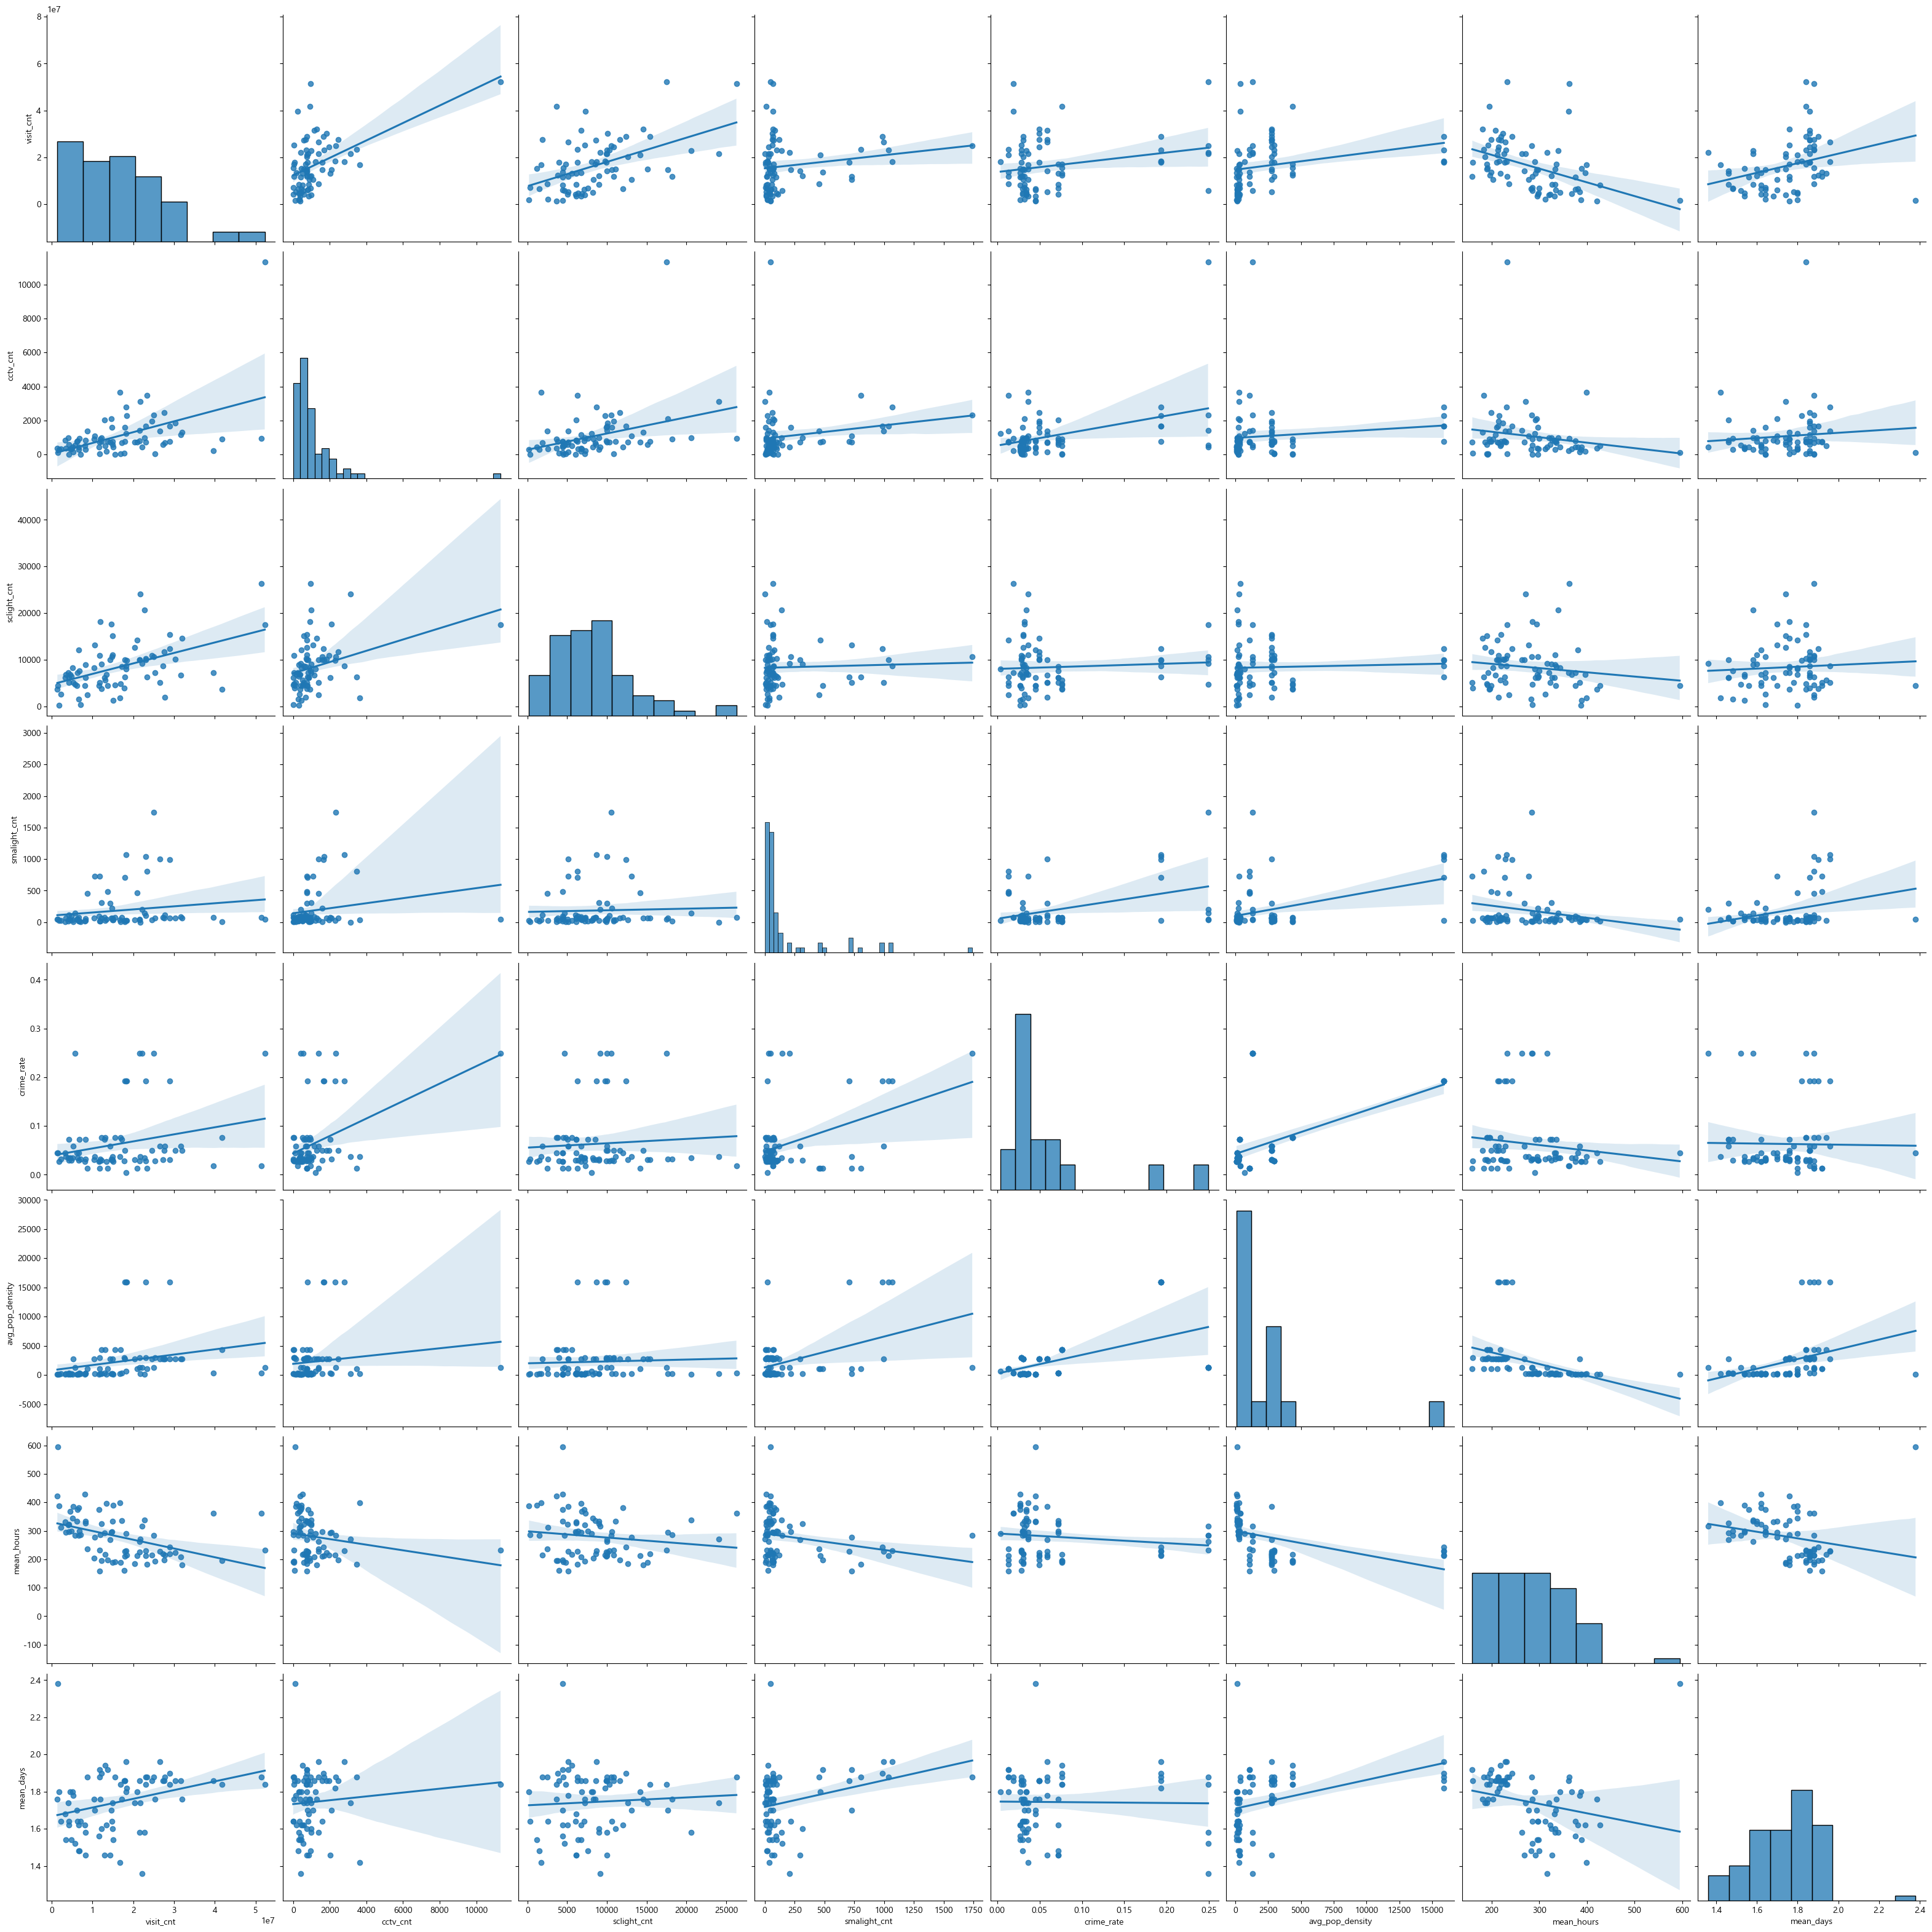

In [28]:
sns.pairplot(data_df, kind='reg', height=4)
plt.savefig('pairplot_concat',dpi=300)

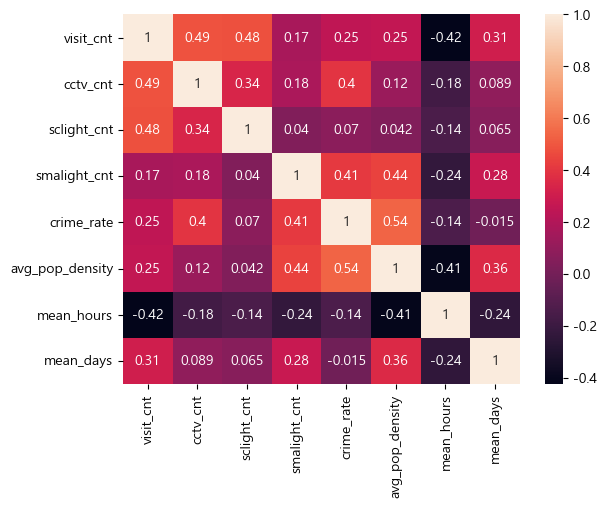

In [18]:
sns.heatmap(df_for_heat.corr(), annot=True)
plt.show()

In [20]:
data_df1 = data_df.drop('mean_days', axis=1)

In [19]:
a = {
    'visit_cnt' : 'sum',
    'cctv_cnt' : 'sum',
    'sclight_cnt' : 'sum',
    'smalight_cnt' : 'sum',
    'mean_hours' : 'mean',
    #'mean_days' : 'mean',
    'crime_rate' : 'mean',
    'avg_pop_density' : 'mean',
    
}


state_groupby1 = data_df.groupby(['state'], as_index=False).agg(a)
state_groupby1

,state,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,mean_hours,crime_rate,avg_pop_density
0,강원도,50118648,1851.0,16910.0,212.0,394.96,0.0271,90.36
1,경기도,126607094,16003.0,51854.0,2173.0,276.16,0.2489,1303.40
2,경상남도,49487026,5101.0,33514.0,275.0,315.20,0.0722,316.54
3,경상북도,19024802,2523.0,30588.0,226.0,412.52,0.0451,139.72
4,광주광역시,99400593,1720.0,42196.0,255.0,208.20,0.0283,2964.74
5,대구광역시,132201023,9128.0,57018.0,237.0,205.28,0.0494,2744.80
6,대전광역시,101756434,3550.0,60008.0,306.5,203.24,0.0307,2781.58
7,부산광역시,99646860,2198.0,22283.0,191.0,198.00,0.0767,4378.44
8,서울특별시,106405870,9226.0,47125.0,3826.0,226.12,0.1929,15899.10
9,세종특별자치시,18211355,1218.0,8029.0,23.0,290.40,0.0041,708.64


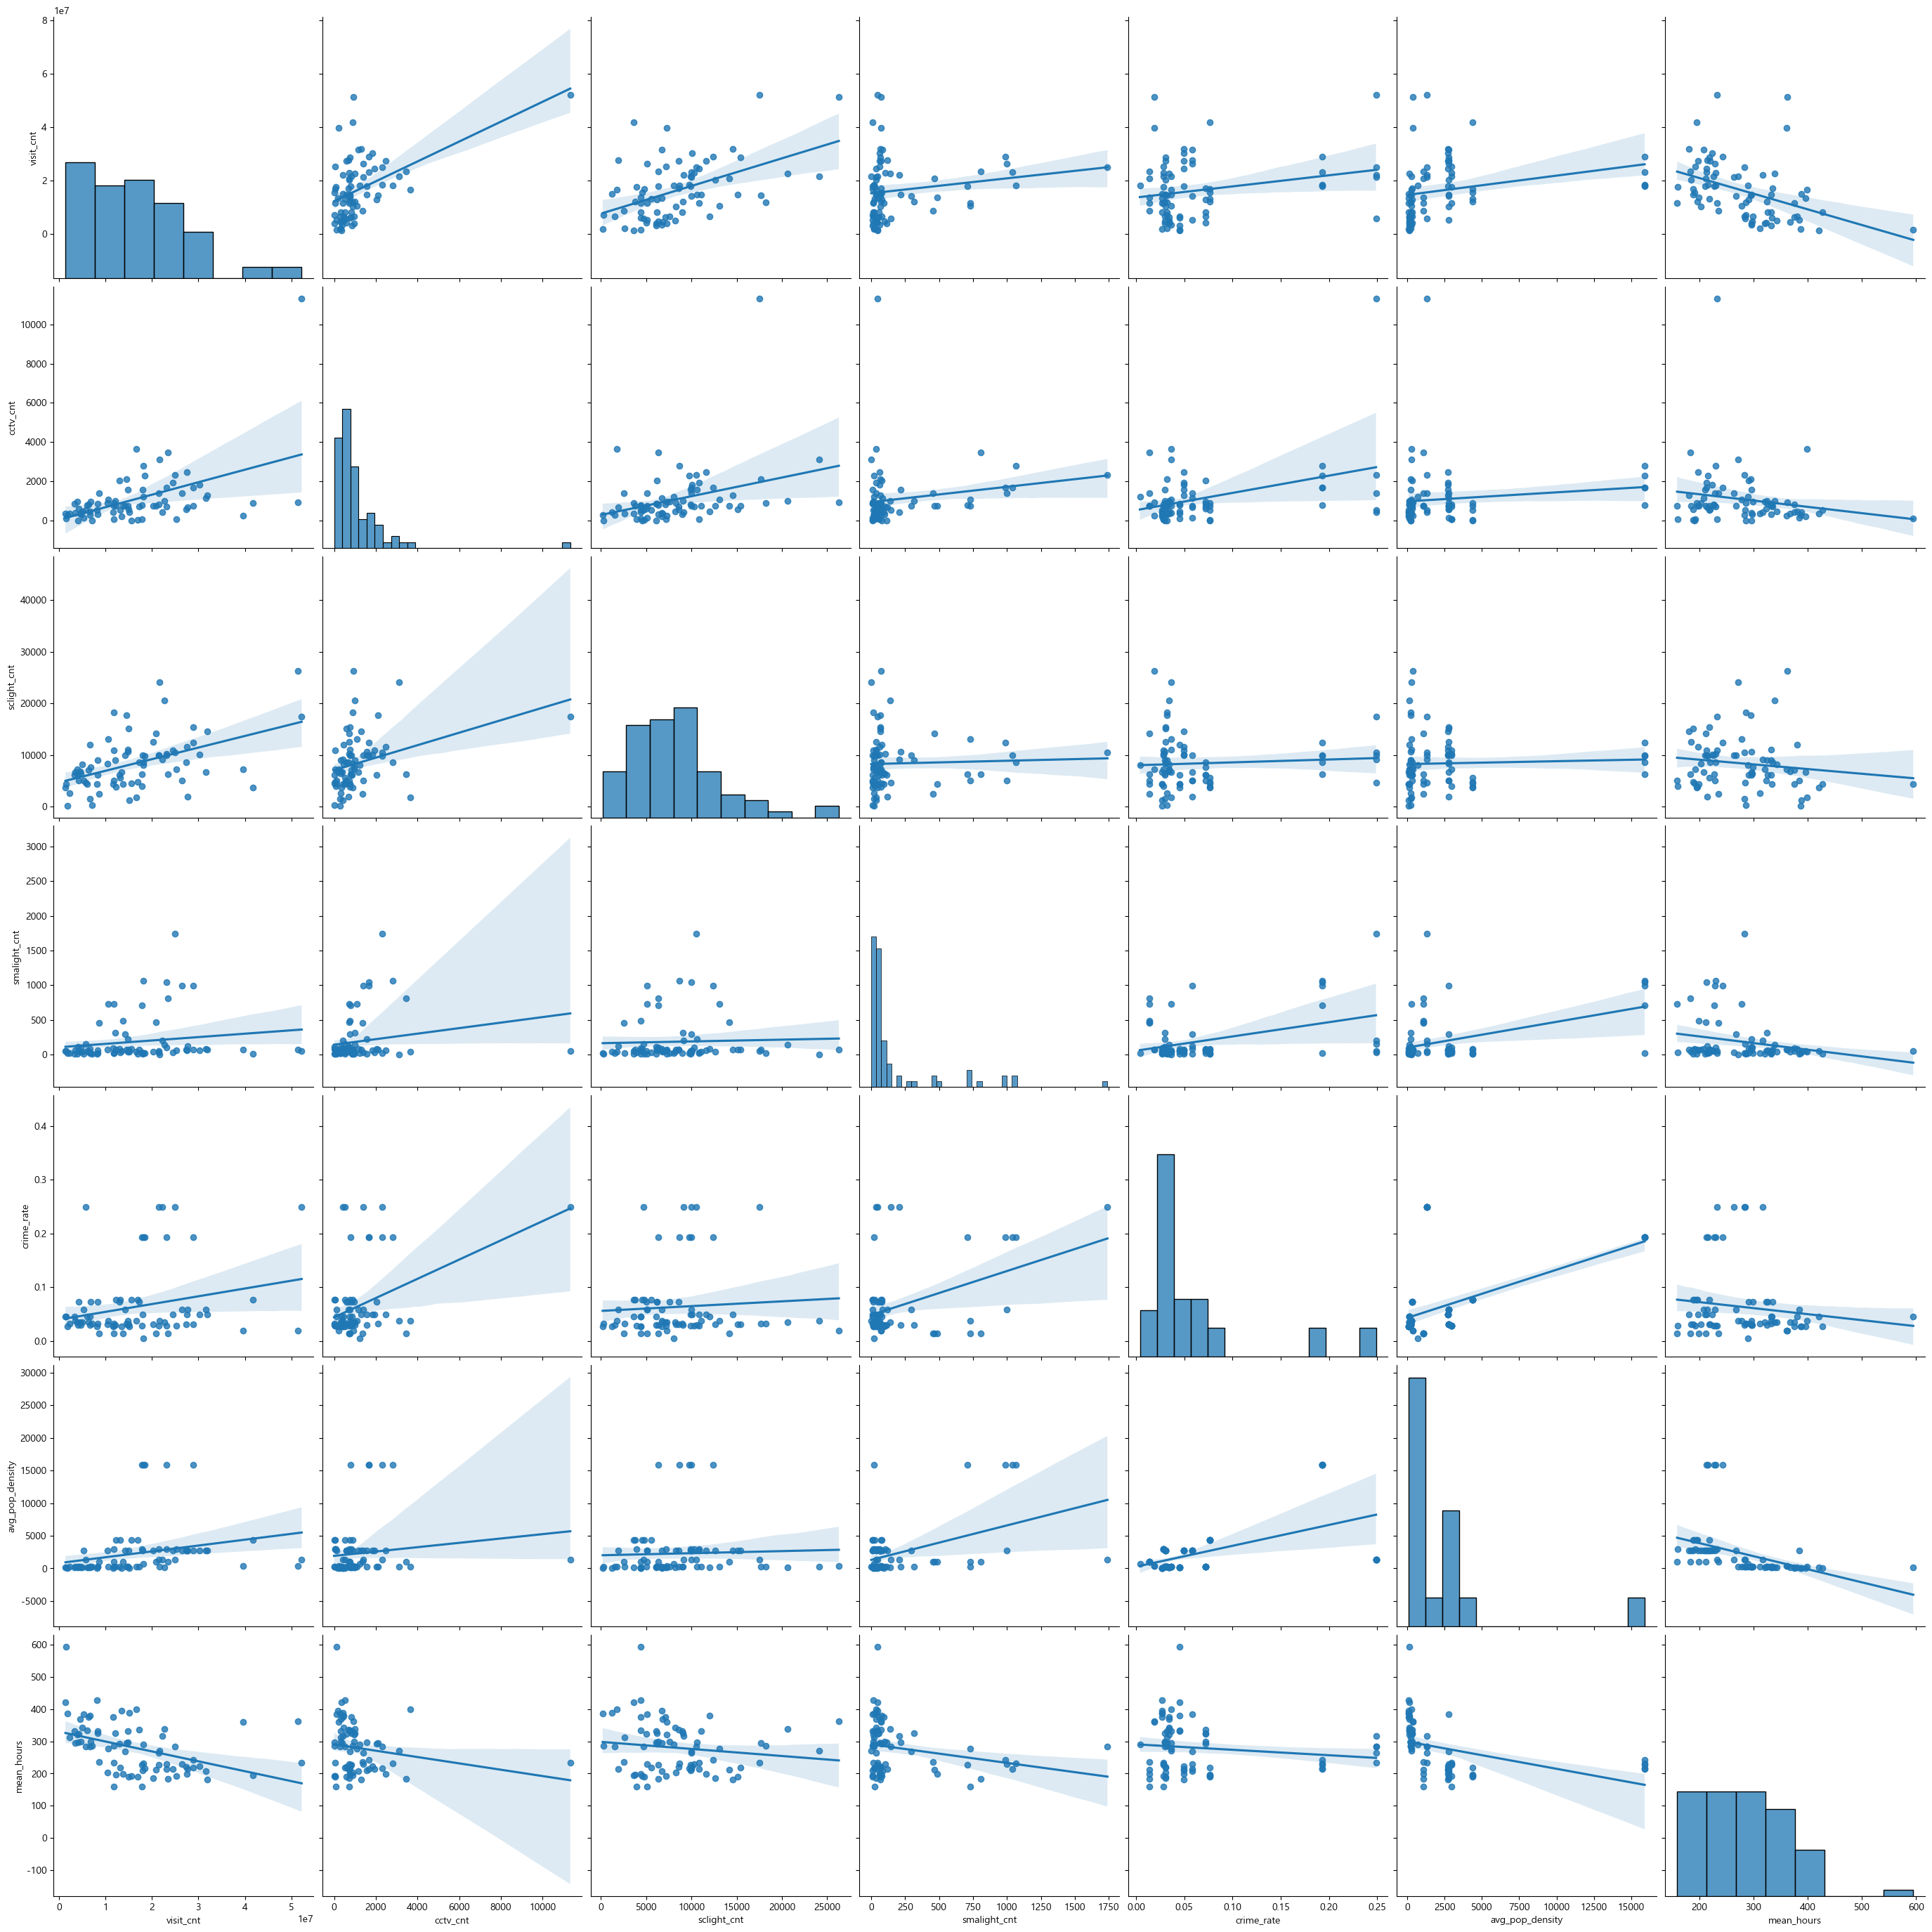

In [29]:
sns.pairplot(data_df1, kind='reg', height=4)
plt.savefig('pairplot_concat_7rsc',dpi=300)

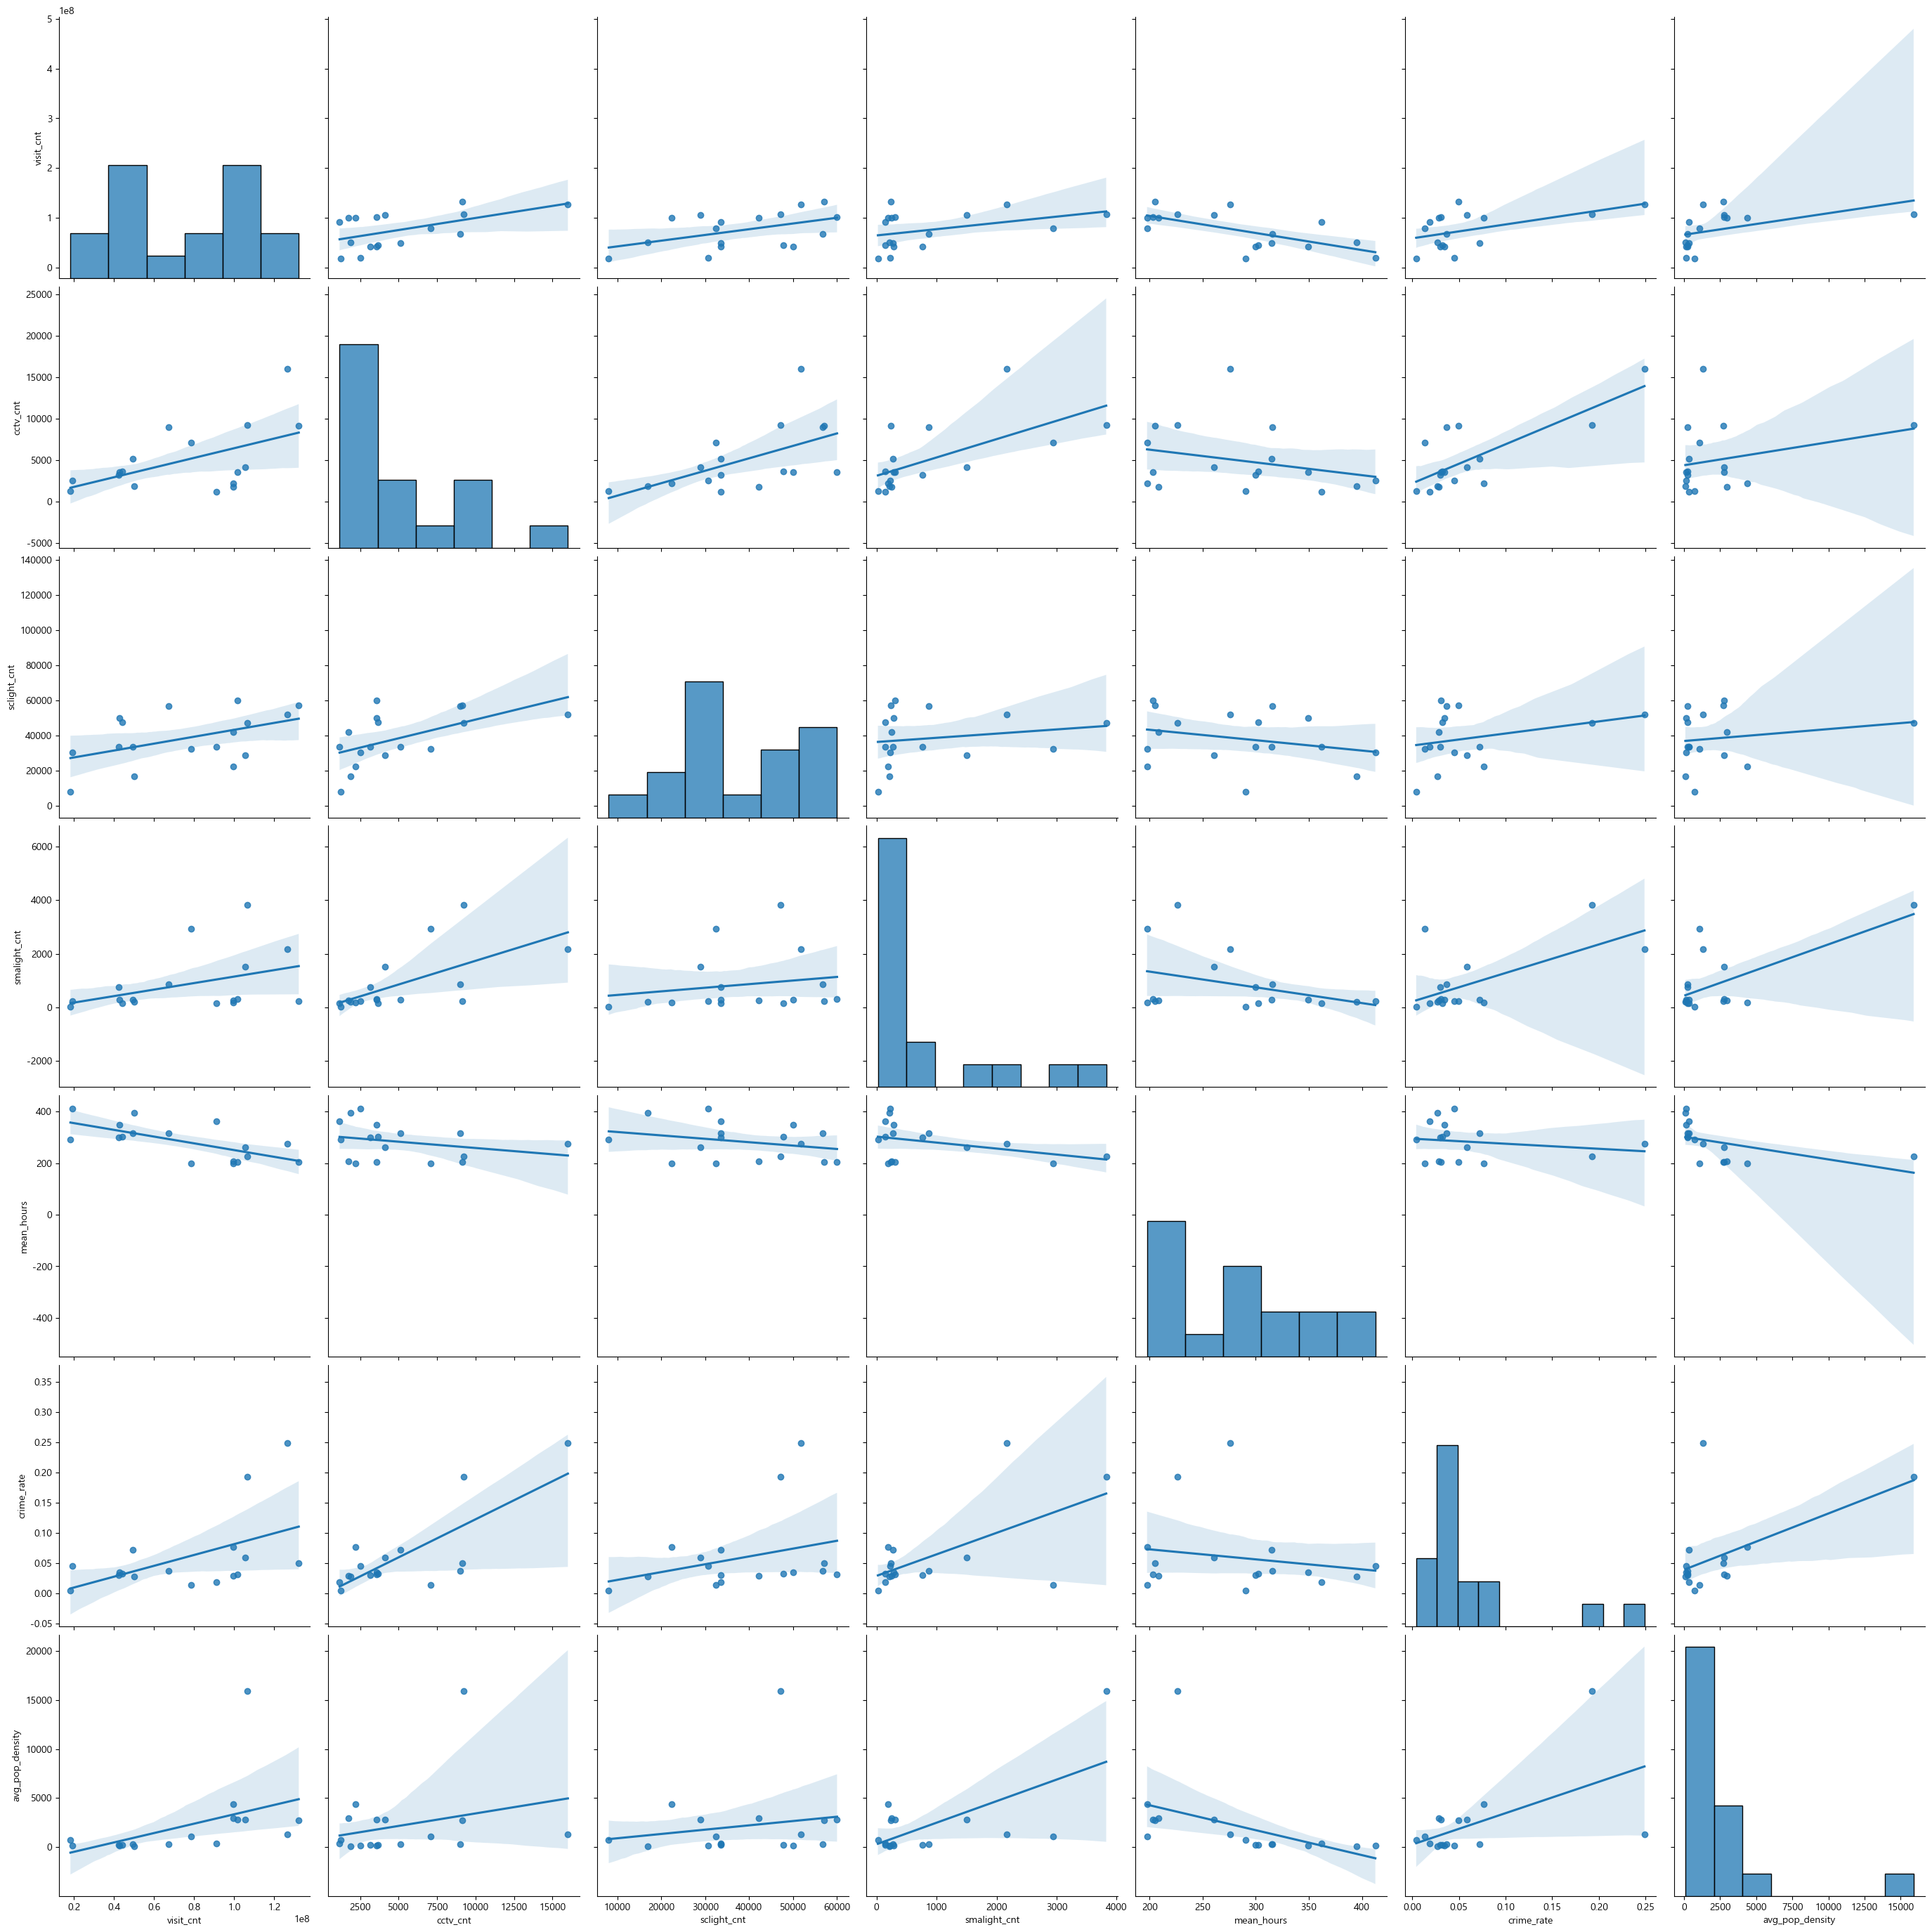

In [30]:
sns.pairplot(state_groupby1, kind='reg', height=4)
plt.savefig('pairplot_GroupbyState_7rsc',dpi=300)